# Uczenie maszynowe i sieci neuronowe

In [1]:
conda install keras

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/michal/anaconda3/envs/myenv

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          10 KB
    keras-2.12.0               |  py311hca03da5_0         2.1 MB
    keras-preprocessing-1.1.2  |     pyhd3eb1b0_0          35 KB
    libgfortran-5.0.0          |11_3_0_hca03da5_28         142 KB
    numpy-1.26.4               |  py311he598dae_0          12 KB
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  blas               pkgs/main/osx-arm64::blas-1.0-openblas 
  keras              pkgs/main/osx-arm64::keras-2

In [3]:
conda install tensorflow

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/michal/anaconda3/envs/myenv

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.2.0        |            eigen           3 KB
    abseil-cpp-20211102.0      |       hc377ac9_0         933 KB
    absl-py-1.4.0              |  py311hca03da5_0         240 KB
    astunparse-1.6.3           |             py_0          17 KB
    cryptography-41.0.3        |  py311h3c57c4d_0         1.3 MB
    cyrus-sasl-2.1.28          |       h458e800_1         222 KB
    flatbuffers-2.0.0          |       hc377ac9_0         890 KB
    gast-0.4.0                 |     pyhd3eb1b0_0          13 KB
    google-auth-2.6.0          |     pyhd3eb1b0_0          83 KB
    google-auth-oauthlib-0.5.2 |  py311hca03da5_0          30 K

In [7]:
import keras
keras.__version__

'3.7.0'

# Przykład regresji: przewidywanie cen mieszkań

Dwa poprzednie przykłady były problemami klasyfikacji, w których celem było przewidzenie etykiety opisującej dane wejściowe. Innym spotykanym często problemem uczenia maszynowego jest regresja, która polega na przewidywaniu wartości o charakterze ciągłym, a nie dyskretnej etykiety. Przykładem regresji jest przewidywanie jutrzejszej temperatury na podstawie zgromadzonych danych meteorologicznych lub przewidywanie czasu potrzebnego na skończenie oprogramowania na podstawie jego specyfikacji.

Nie mylmy regresji z algorytmem regresji logistycznej. Regresja logistyczna wbrew swej nazwie nie jest algorytmem regresji. Jest algorytmem klasyfikacji.

## Zbiór cen mieszkań w Bostonie


Będziemy starali się przewidzieć medianę cen mieszkań w podmiejskich dzielnicach Bostonu w połowie lat 70. XX w. na podstawie danych określających konkretną dzielnicę, takich jak współczynnik przestępczości czy lokalny podatek od nieruchomości. Tym razem będziemy korzystali ze zbioru danych, który różni się od wcześniejszych zbiorów dwiema rzeczami. Ma dość mało elementów: tylko 506 (podzielono je na zbiór treningowy zawierający 404 próbki i zbiór testowy zawierający 102 próbki). Każda cecha danych wejściowych (przykładem cechy jest współczynnik przestępczości) jest wyrażona w innej skali. Niektóre wartości są ułamkami przyjmującymi wartości 0 do 1, inne przyjmują wartości z zakresu od 1 do 12, a jeszcze inne — od 0 do 100 itd.

Przyjrzyjmy się danym:

In [8]:
from tensorflow.keras.datasets import boston_housing
import tensorflow as tf

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [9]:
train_data.shape

(404, 13)

In [10]:
test_data.shape

(102, 13)


Jak widać, zbiór treningowy składa się z 404 próbek, a zbiór testowy ze 102 próbek. Każda próbka jest opisana za pomocą 13 cech numerycznych:

1. Współczynnik przestępczości 
2. Część działek o powierzchni przekraczającej 2300 metrów kwadratowych.
3. Część powierzchni działek działalności gospodarczych nie zajmujących się sprzedażą.
4. Sztuczna zmienna rzeki Charles River (= 1 jeżeli działka znajduje się przy rzece; 0 w pozostałych przypadkach).
5. Stopień koncentracji tlenków azotu(cząstek na 10 milionów).
6. Średnia liczba pokoi w budynku.
7. Część mieszkań zajętych przez właścicieli, które zostały wybudowane przed rokiem 1940.
8. Średnia ważona odległości od pięciu stref, w których znajduje się najwięcej zakładów pracy.
9. Indeks dostępności dróg szybkiego ruchu
10. Pełny podatek od nieruchomości za 10000 $.
11. Stosunek liczby uczniów do liczby nauczycieli.
12. 1000 * (Bk - 0.63) ** 2, gdzie Bk ułamkiem czarnoskórej ludności miasta.
13. % niższego statusu populacji.

Celem jest określenie median wartości domów zamieszkanych przez właścicieli — wyrażonych w tysiącach dolarów:

In [11]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13


Ceny zwykle wahają się od 10 000 dolarów do 50 000 dolarów. Tanio? Pamiętaj o tym, że to wartości z połowy lat 70. Ceny w tym zbiorze nie uwzględniają inflacji.

## Przygotowywanie danych


Ładowanie do sieci neuronowej wartości należących do kilku różnych zakresów może sprawić problem. Niektóre sieci są w stanie automatycznie dopasować do siebie tak różne dane, ale z pewnością utrudni to proces uczenia. Najlepszą praktyką podczas pracy z takimi danymi jest przeprowadzenie normalizacji poszczególnych cech: w przypadku każdej cechy danych wejściowych (kolumny macierzy danych wejściowych) należy przeprowadzić operację odejmowania od wartości średniej i dzielenia przez odchylenie standardowe — wówczas wartości cech zostaną wyśrodkowane wokół zera i będą charakteryzowały się jednostkowym odchyleniem standardowym. Operację tę można z łatwością przeprowadzić dzięki bibliotece Numpy.

In [12]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Zwróćmy uwagę na to, że wielkości używane podczas normalizacji testowego zbioru danych są obliczane na podstawie treningowego zbioru danych. Nigdy nie powinniśmy korzystać z wartości obliczonych na podstawie treningowego zbioru danych. Dotyczy to nawet tak prostych zadań jak normalizacja danych.

## Budowanie sieci


Dysponujemy małą liczbą próbek, a więc zbudujemy bardzo małą sieć zawierającą dwie warstwy ukryte, składające się z 64 jednostek każda. Ogólnie rzecz biorąc, im mniejszą ilością danych treningowych dysponujemy, tym bardziej jesteśmy narażeni na nadmierne dopasowanie sieci. W celu zminimalizowania efektu nadmiernego dopasowania można między innymi korzystać z małej sieci.

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    # Będziemy tworzyć wiele instancji tego samego modelu, 
    # a więc konstruując je, będziemy korzystać z funkcji.
    model = models.Sequential()
    model.add(layers.Input(shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


Sieć kończy się pojedynczą jednostką bez funkcji aktywacji (jest to warstwa liniowa). To typowe rozwiązanie stosowane w regresji skalarnej (regresji, w której próbuje się przewidzieć jedną wartość o charakterze ciągłym). Zastosowanie funkcji aktywacji ograniczyłoby zakres wartości wyjściowych możliwych do wygenerowania. Gdybyśmy zastosowali w ostatniej warstwie tej sieci funkcję aktywacji sigmoid, to sieć mogłaby generować tylko wartości znajdujące się w zakresie od 0 do 1. W praktyce zastosowaliśmy ostatnią warstwę o charakterze liniowym, a więc możemy przewidywać dowolne wartości.

Zwróćmy uwagę na to, że sieć jest kompilowana z funkcją straty mse (średniego błędu kwadratowego). Funkcja ta oblicza kwadrat różnicy między wartościami przewidywanymi przez sieć i wartościami docelowymi. Ta funkcja straty jest często używana w czasie rozwiązywania problemów regresji.

Podczas trenowania monitorowana jest nowa metryka: średni błąd bezwzględny (mae). Jest to bezwzględna wartość różnicy między wartościami przewidywanymi przez sieć a wartościami docelowymi. Średnia wartość błędu bezwzględnego o wartości równej np. 0,5 w przypadku tego problemu oznacza, że przewidywane ceny średnio odbiegają od wartości docelowych o 500 dolarów.

## K-składowa walidacja krzyżowa


W celu oceny sprawności działania sieci podczas dostrajania jej parametrów, takich jak liczba epok trenowania, możemy tak jak wcześniej podzielić dane treningowe na podzbiór treningowy i podzbiór walidacyjny, ale nasz zbiór jest na tyle mały, że podzbiór walidacyjny utworzony w ten sposób byłby bardzo mały (zawierałby np. tylko 100 elementów). W związku z tym wynik walidacji mógłby ulegać dużej zmianie w zależności od tego, które elementy treningowego zbioru danych byłyby używane podczas walidacji, a które podczas trenowania. Wyniki walidacji mogłyby charakteryzować się dużą wariancją zależną od podziału zbioru testowego na podzbiór testowy i walidacyjny. W takiej sytuacji nie można przeprowadzić wiarygodnej walidacji.

Wówczas najlepiej jest skorzystać z walidacji krzyżowej k-składowych. Polega ona na podziale dostępnych danych na k części (zwykle 4 lub 5), utworzeniu k identycznych modeli i trenowaniu każdego z nich na k – 1 częściach zbioru i przeprowadzaniu ewaluacji na pozostałej, nieużytej wcześniej części zbioru dostępnych danych. Wynik walidacji modelu jest średnią wyników walidacji wszystkich składowych modeli.

Kod implementujący to rozwiązanie jest dość prosty:

In [16]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Przygotuj dane walidacyjne: dane z k-tej składowej.
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Przygotuj dane treningowe: dane z pozostałych składowych.
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Zbuduj model Keras (model został skompilowany wcześniej).
    model = build_model()
    # Trenuj model w trybie cichym (parametr verbose = 0).
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Przeprowadź ewaluację modelu przy użyciu danych walidacyjnych.
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0


I0000 00:00:1737389397.295914  127078 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:c4:00.0, compute capability: 8.9
I0000 00:00:1737389399.058655  130092 service.cc:148] XLA service 0x7f0240019a30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737389399.058785  130092 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-01-20 17:09:59.072476: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737389399.106679  130092 cuda_dnn.cc:529] Loaded cuDNN version 90500
I0000 00:00:1737389399.240760  130092 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


processing fold # 1
processing fold # 2
processing fold # 3


In [17]:
all_scores

[2.199774742126465, 3.028644323348999, 2.5602798461914062, 2.503951072692871]

In [18]:
np.mean(all_scores)

np.float64(2.5731624960899353)


Podczas poszczególnych iteracji uzyskujemy dość zróżnicowane wartości walidacji (od 2,6 do 3,2). Średnia wartość (3,0) jest wartością, na której można o wiele bardziej polegać niż na poszczególnych wynikach walidacji składowych — właśnie to chcieliśmy uzyskać, stosując k-składową walidację krzyżową. W tym przypadku odchodzimy od wartości docelowych średnio o 3000 dolarów, co jest znaczącą kwotą przy cenach znajdujących się w zakresie od 10 000 do 50 000 dolarów.

Spróbujmy wydłużyć proces trenowania do 500 epok. W celu obserwacji wydajności modelu w każdej epoce zmodyfikujemy pętlę treningową tak, aby zapisywała wynik walidacji poszczególnych epok w dzienniku pracy.


In [19]:
from tensorflow.keras import backend as K

# Some memory clean-up
K.clear_session()

In [20]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Przygotowuje dane walidacyjne: dane z k-tej składowej.
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Przygotowuje dane treningowe: dane z pozostałych składowych.
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Możemy zdudować model Keras, który został skompilowany wcześniej:
    model = build_model()
    # Przeprowadza ewaluację modelu przy użyciu danych walidacyjnych.
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Teraz możemy obliczyć średni wynik walidacji wszystkich składowych poszczególnych epok:

In [21]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Przedstawmy średni błąd bezwzględny na wykresie:

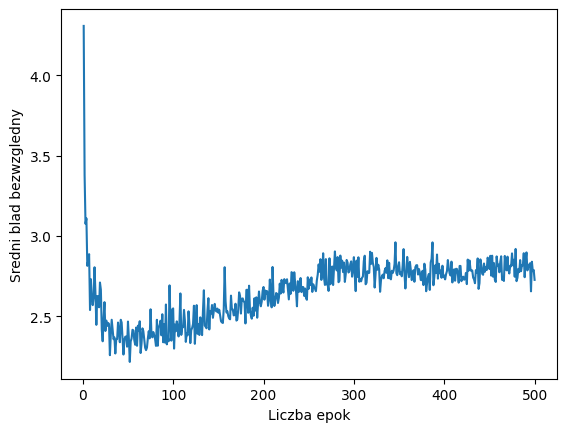

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Liczba epok')
plt.ylabel('Sredni blad bezwzgledny')
plt.show()


Wykres może okazać się dość trudny do przeanalizowania z powodu skali i dużej wariancji. Przeprowadźmy następujące operacje:

* Pomińmy 10 pierwszych punktów wykresu (wymagają one zastosowania innej skali niż reszta krzywej).
* Zastąpmy każdy punkt wykresu ruchomą średnią wykładniczą poprzednich punktów (spowoduje to wyrównanie przebiegu krzywej).

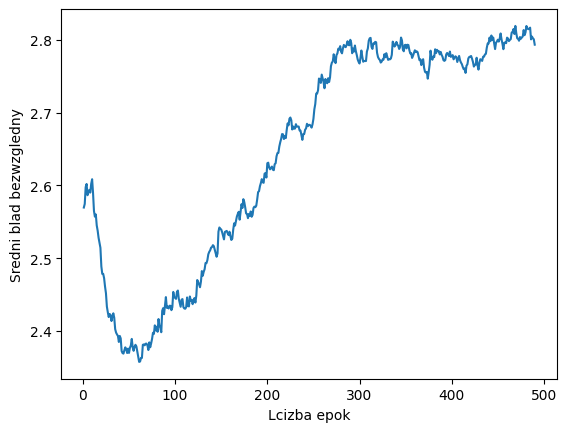

In [23]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Lcizba epok')
plt.ylabel('Sredni blad bezwzgledny')
plt.show()


Z ostatniego wykresu wynika, że średni błąd bezwzględny przestaje ulegać poprawie po 80 epokach. Po przekroczeniu tego punktu model zaczyna ulegać przeuczeniu.

Po zakończeniu dostrajania pozostałych parametrów modelu (poza liczbą epok możemy zmienić również rozmiar warstw ukrytych) przeprowadzamy trenowanie ostatecznej wersji modelu na całym zbiorze danych treningowych (w procesie tym korzystamy z optymalnych parametrów), a następnie sprawdzamy jego wydajność na zbiorze testowym.


In [24]:
# Utwórz nową, skompilowaną wersję modelu.
model = build_model()
# Trenuj model na całym zbiorze danych treningowych.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 11.8554 - mae: 2.3800


In [25]:
test_mae_score

2.601586103439331

Przewidywane ceny wciąż odbiegają od rzeczywistych średnio o 2550 $.

## Wnioski


Oto wnioski, które należy wynieść z tego przykładu:

* Regresję przeprowadza się przy użyciu innej funkcji straty od tej, z której korzystaliśmy podczas klasyfikacji. W czasie rozwiązywania problemów dotyczących regresji często stosuje się funkcję straty mse (średniego błędu kwadratowego).
* Podczas pracy nad problemem regresji stosuje się również inne metryki ewaluacyjne (nie używa się tych samych metryk, które są stosowane w problemach klasyfikacji). Oczywiście wynika to z tego, że koncepcja dokładności nie odnosi się do regresji. Metryką stosowaną w regresji jest średni błąd bezwzględny realizowany przez funkcję mae.
* Jeżeli cechy danych wejściowych przyjmują wartości o różnych zakresach, to każda cecha powinna zostać niezależnie przeskalowana podczas wstępnej obróbki danych.
* W pracy z małym zbiorem danych ewaluację modelu warto jest oceniać model przy użyciu techniki k-składowej walidacji krzyżowej.
* W pracy z małym zbiorem danych lepiej jest korzystać z małej sieci z kilkoma warstwami ukrytymi (zwykle stosuje się od 1 do 2 warstw), co pozwoli uniknąć przeuczenia modelu.

To ostatni z trzech przykładów wprowadzających do uczenia maszynowego. Po ich przeanalizowaniu potrafisz pracować nad typowymi problemami związanymi z danymi wejściowymi w postaci wektora:

* Klasyfikacja binarna
* Klasyfikacja wieloklasowa z pojedynczymi etykietami
* Regresja skalarna

Na podstawie kolejnych przykładów poznasz dokładniej koncepcje wstępnego przetwarzania danych, ewaluacji modelu i przeuczenia.

## Zadania do wykonania

1. Uzupełnić materiały o własne przemyślenia, wnioski, grafiki, schematy...